# Blockbusters

For this pub quiz game we need to generate a 5x5 hexagonal grid similar to the one shown here (ignore the red coloured hexagons).

![blockbusters-example.png](attachment:blockbusters-example.png)

In the example shown here, and the one I played at the pub there is a total of 22 hexagons.
In the game these hexagons were populated with 22 numbers ranging from 1 - 25

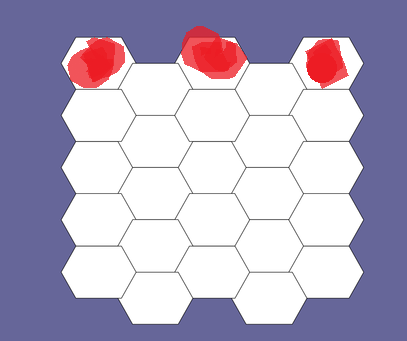

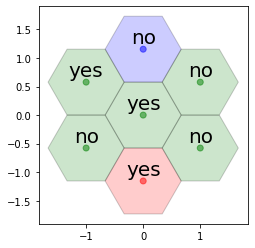

In [13]:
# Here is the raw code from a stack overflow post which was one of the few results I found when searching online for solutions.
#https://stackoverflow.com/questions/46525981/how-to-plot-x-y-z-coordinates-in-the-shape-of-a-hexagonal-grid

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

coord = [[0,0,0],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0],[1,0,-1]]
colors = [["Green"],["Blue"],["Green"],["Green"],["Red"],["Green"],["Green"]]
labels = [['yes'],['no'],['yes'],['no'],['yes'],['no'],['no']]

# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartersian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# Add some coloured hexagons
for x, y, c, l in zip(hcoord, vcoord, colors, labels):
    color = c[0].lower()  # matplotlib understands lower case words for colours
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor=color, alpha=0.2, edgecolor='k')
    ax.add_patch(hex)
    # Also add a text label
    ax.text(x, y+0.2, l[0], ha='center', va='center', size=20)

# Also add scatter points in hexagon centres
ax.scatter(hcoord, vcoord, c=[c[0].lower() for c in colors], alpha=0.5)

plt.show()

### Coordinate system

To plot the hexagons the code I have appears to use the 'Cube Coordinate' system.
Will need to come up with a function to iterate through these coordinate so that all that needs to be specified is how tall by how wide.

![hex-coords.png](attachment:hex-coords.png)

https://math.stackexchange.com/questions/2254655/hexagon-grid-coordinate-system

Here explains the coordinate system which has 3 values x,y,z. Here I have removed the columns that will be of no use to me. 
While I would like to develop a solution that can create any number of hexagons, these values have been hard coded for now.
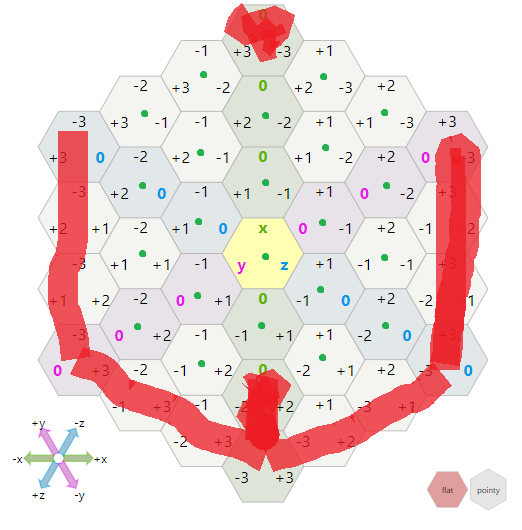

In [3]:
coord = [

# center line top to bottom
[0, 2, -2],
[0, 1, -1],
[0, 0, 0],
[0, -1, 1],

# line right of center
[1, 2, -3],
[1, 1, -2],
[1, 0, -1],
[1, -1, 0],
[1, -2, 1],

# right most line
[2, 1, -3],
[2, 0, -2],
[2, -1, -1],
[2, -2, 0],

# line left of center
[-1, 3, -2],
[-1, 2, -1],
[-1, 1, 0],
[-1, 0, 1],
[-1, -1, 2],


# left most line
[-2, 3, -1],
[-2, 2, 0],
[-2, 1, 1],
[-2, 0, 2],

]


['15', '11', '18', '7', '9', '8', '5', '16', '6', '13', '14', '1', '12', '24', '19', '10', '22', '17', '23', '20', '3', '2']


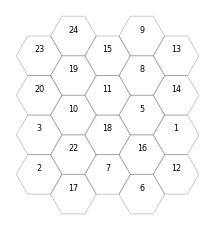

In [9]:
#https://stackoverflow.com/questions/46525981/how-to-plot-x-y-z-coordinates-in-the-shape-of-a-hexagonal-grid
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import random

# We will take num_hex number of random ints from a sample of num_hex + num_missing ints.

num_hex = 22
num_missing = 3

randomlist = random.sample(range(1,1+num_hex+num_missing), num_hex)

labels = list(map(str, randomlist))
print(labels)

# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartersian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# Add some coloured hexagons
for x, y, l in zip(hcoord, vcoord, labels):
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor='w', alpha=0.2, edgecolor='k')
    ax.add_patch(hex)

    # Also add a text label
    ax.text(x, y+0.2, l, ha='center', va='center', size=8)

# Also add scatter points in hexagon centres
ax.scatter(hcoord, vcoord, alpha=0) # Adds invisible centroids, not sure why its needed but it is

plt.axis('off') # Remove unnecessary axis

plt.show()

['25', '17', '23', '5', '18', '22', '10', '1', '4', '15', '12', '13', '21', '7', '16', '9', '6', '3', '8', '2', '19', '24']


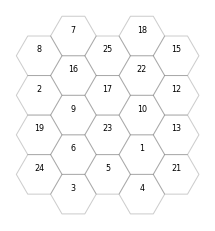

In [173]:
def create_plot():
    # We will take num_hex number of random ints from a sample of num_hex + num_missing ints.

    num_hex = 22
    num_missing = 3

    randomlist = random.sample(range(1,1+num_hex+num_missing), num_hex)

    labels = list(map(str, randomlist))
    print(labels)

    # Horizontal cartesian coords
    hcoord = [c[0] for c in coord]

    # Vertical cartersian coords
    vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')

    # Add some coloured hexagons
    for x, y, l in zip(hcoord, vcoord, labels):
        hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                            orientation=np.radians(30), 
                            facecolor='w', alpha=0.2, edgecolor='k')
        ax.add_patch(hex)

        # Also add a text label
        ax.text(x, y+0.2, l, ha='center', va='center', size=8)

    # Also add scatter points in hexagon centres
    ax.scatter(hcoord, vcoord, alpha=0) # Adds invisible centroids, not sure why its needed but it is

    plt.axis('off') # Remove unnecessary axis

    #plt.show()

    return ax

x = create_plot()

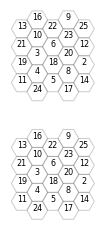

In [192]:
num_hex = 22
num_missing = 3

randomlist = random.sample(range(1,1+num_hex+num_missing), num_hex)
labels = list(map(str, randomlist))

randomlist2 = random.sample(range(1,1+num_hex+num_missing), num_hex)
labels2 = list(map(str, randomlist2))

# Horizontal cartesian coords
hcoord = [c[0] for c in coord]
# Vertical cartersian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

fig, ax = plt.subplots(2,1)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

# Add some coloured hexagons
for x, y, l in zip(hcoord, vcoord, labels):
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                        orientation=np.radians(30), 
                        facecolor='w', alpha=0.2, edgecolor='k')
    ax[0].add_patch(hex)

    # Also add a text label
    ax[0].text(x, y+0.2, l, ha='center', va='center', size=8)

# Also add scatter points in hexagon centres
ax[0].scatter(hcoord, vcoord, alpha=0) # Adds invisible centroids, not sure why its needed but it is

# Add some coloured hexagons
for x, y, l in zip(hcoord, vcoord, labels):
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                        orientation=np.radians(30), 
                        facecolor='w', alpha=0.2, edgecolor='k')
    ax[1].add_patch(hex)

    # Also add a text label
    ax[1].text(x, y+0.2, l, ha='center', va='center', size=8)

# Also add scatter points in hexagon centres
ax[1].scatter(hcoord, vcoord, alpha=0) # Adds invisible centroids, not sure why its needed but it is

ax[0].axis('off') # Remove unnecessary axis
ax[1].axis('off') # Remove unnecessary axis

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


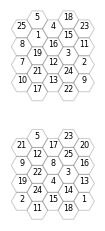

In [200]:
def create_2_plots():
    
    num_hex = 22
    num_missing = 3

    randomlist = random.sample(range(1,1+num_hex+num_missing), num_hex)
    labels = list(map(str, randomlist))

    randomlist2 = random.sample(range(1,1+num_hex+num_missing), num_hex)
    labels2 = list(map(str, randomlist2))

    # Horizontal cartesian coords
    hcoord = [c[0] for c in coord]
    # Vertical cartersian coords
    vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

    fig, ax = plt.subplots(2,1)
    ax[0].set_aspect('equal')
    ax[1].set_aspect('equal')

    # Add some coloured hexagons
    for x, y, l in zip(hcoord, vcoord, labels):
        hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                            orientation=np.radians(30), 
                            facecolor='w', alpha=0.2, edgecolor='k')
        ax[0].add_patch(hex)

        # Also add a text label
        ax[0].text(x, y+0.2, l, ha='center', va='center', size=8)

    # Also add scatter points in hexagon centres
    ax[0].scatter(hcoord, vcoord, alpha=0) # Adds invisible centroids, not sure why its needed but it is

    # Add some coloured hexagons
    for x, y, l in zip(hcoord, vcoord, labels2):
        hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                            orientation=np.radians(30), 
                            facecolor='w', alpha=0.2, edgecolor='k')
        ax[1].add_patch(hex)

        # Also add a text label
        ax[1].text(x, y+0.2, l, ha='center', va='center', size=8)

    # Also add scatter points in hexagon centres
    ax[1].scatter(hcoord, vcoord, alpha=0) # Adds invisible centroids, not sure why its needed but it is

    ax[0].axis('off') # Remove unnecessary axis
    ax[1].axis('off') # Remove unnecessary axis

    return fig

x = create_2_plots()
x.show()

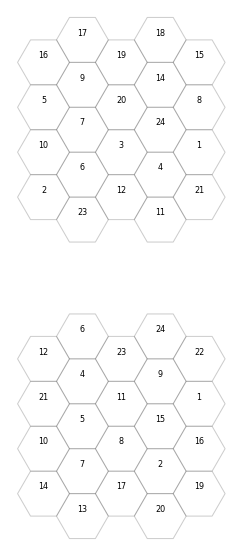

In [201]:
from matplotlib.backends.backend_pdf import PdfPages

plot1 = create_2_plots()
plot1.set_size_inches([7,10])
pp = PdfPages('test.pdf')
pp.savefig(plot1)
pp.close()

['25', '4', '24', '14', '13', '6', '5', '16', '18', '12', '7', '23', '15', '11', '1', '21', '10', '17', '3', '19', '22', '2']
['2', '25', '13', '9', '8', '10', '15', '5', '19', '12', '23', '24', '11', '14', '7', '1', '3', '22', '4', '20', '21', '6']


TypeError: int() argument must be a string, a bytes-like object or a number, not 'Figure'

<Figure size 432x288 with 0 Axes>

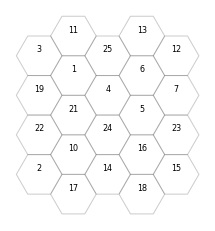

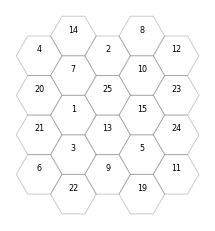

In [156]:
# https://stackoverflow.com/questions/17788685/python-saving-multiple-figures-into-one-pdf-file

from matplotlib import pyplot as plt

fig = plt.figure()

axis1 = create_plot()
axis2 = fig.add_subplot(create_plot())
fig.savefig('multipleplots.png')

https://www.redblobgames.com/grids/hexagons/

Insert image here
